# Assignment 2 - Data Clustering

Dataset name : London Crime Data, 2008 - 2016

Dataset Description : Crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

# Initiating Spark

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession \
    .builder \
    .appName("Data Clustering") \
    .getOrCreate()

In [4]:
print(spark)

# Loading Dataset

In [5]:
df = spark.read.csv("F:/dataset/london_crime_by_lsoa.csv", header=True, inferSchema=True)

In [6]:
df.count()

13490604

In [7]:
df.show()

+---------+--------------------+--------------------+--------------------+-----+----+-----+
|lsoa_code|             borough|      major_category|      minor_category|value|year|month|
+---------+--------------------+--------------------+--------------------+-----+----+-----+
|E01001116|             Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646|           Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|             Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774|           Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004563|          Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
|E01001320|              Ealing|  Theft and Handling|         Other Theft|    0|2012|    5|
|E01001342|              Ealing|Violence Against ...|    Offensive Weapon|    0|2010|    7|
|E01002633|            Hounslow|             Robbery|   Personal Property|    0|

In [8]:
df.schema

StructType(List(StructField(lsoa_code,StringType,true),StructField(borough,StringType,true),StructField(major_category,StringType,true),StructField(minor_category,StringType,true),StructField(value,IntegerType,true),StructField(year,IntegerType,true),StructField(month,IntegerType,true)))

In [9]:
df.createOrReplaceTempView('londoncrime')

# Training

### 1. Data

In [10]:
data1=spark.sql("SELECT borough, count(borough) AS TOTAL FROM londoncrime GROUP BY borough LIMIT 100")

In [11]:
data1.show()

+--------------------+------+
|             borough| TOTAL|
+--------------------+------+
|             Croydon|602100|
|          Wandsworth|498636|
|              Bexley|385668|
|             Lambeth|519048|
|Barking and Dagenham|311040|
|              Camden|378432|
|           Greenwich|421200|
|              Newham|471420|
|       Tower Hamlets|412128|
|            Hounslow|395928|
|              Barnet|572832|
|              Harrow|365688|
|Kensington and Ch...|296784|
|           Islington|359208|
|               Brent|490644|
|            Haringey|413856|
|             Bromley|523908|
|              Merton|339876|
|         Westminster|366660|
|             Hackney|417744|
+--------------------+------+
only showing top 20 rows



In [12]:
data1.count()

33

### 2. Vector

In [13]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=["TOTAL"],
    outputCol='features')

data1 = assembler.transform(data1)
data1.show()

+--------------------+------+----------+
|             borough| TOTAL|  features|
+--------------------+------+----------+
|             Croydon|602100|[602100.0]|
|          Wandsworth|498636|[498636.0]|
|              Bexley|385668|[385668.0]|
|             Lambeth|519048|[519048.0]|
|Barking and Dagenham|311040|[311040.0]|
|              Camden|378432|[378432.0]|
|           Greenwich|421200|[421200.0]|
|              Newham|471420|[471420.0]|
|       Tower Hamlets|412128|[412128.0]|
|            Hounslow|395928|[395928.0]|
|              Barnet|572832|[572832.0]|
|              Harrow|365688|[365688.0]|
|Kensington and Ch...|296784|[296784.0]|
|           Islington|359208|[359208.0]|
|               Brent|490644|[490644.0]|
|            Haringey|413856|[413856.0]|
|             Bromley|523908|[523908.0]|
|              Merton|339876|[339876.0]|
|         Westminster|366660|[366660.0]|
|             Hackney|417744|[417744.0]|
+--------------------+------+----------+
only showing top

### 3. Training Model

In [14]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

kmeans = KMeans().setK(3).setSeed(1)
model = kmeans.fit(data1)

### 4. Model

In [15]:
predictions = model.transform(data1)

In [16]:
predictions.show(50)

+--------------------+------+----------+----------+
|             borough| TOTAL|  features|prediction|
+--------------------+------+----------+----------+
|             Croydon|602100|[602100.0]|         0|
|          Wandsworth|498636|[498636.0]|         0|
|              Bexley|385668|[385668.0]|         1|
|             Lambeth|519048|[519048.0]|         0|
|Barking and Dagenham|311040|[311040.0]|         1|
|              Camden|378432|[378432.0]|         1|
|           Greenwich|421200|[421200.0]|         1|
|              Newham|471420|[471420.0]|         0|
|       Tower Hamlets|412128|[412128.0]|         1|
|            Hounslow|395928|[395928.0]|         1|
|              Barnet|572832|[572832.0]|         0|
|              Harrow|365688|[365688.0]|         1|
|Kensington and Ch...|296784|[296784.0]|         1|
|           Islington|359208|[359208.0]|         1|
|               Brent|490644|[490644.0]|         0|
|            Haringey|413856|[413856.0]|         1|
|           

### 5. Evaluate Clustering

In [17]:
evaluator = ClusteringEvaluator()

### 6. Silhouette

In [18]:
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.7721641041284032


# Visualization

In [19]:
import pixiedust

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table SPARK_PACKAGES created successfully
Table USER_PREFERENCES created successfully
Table service_connections created successfully



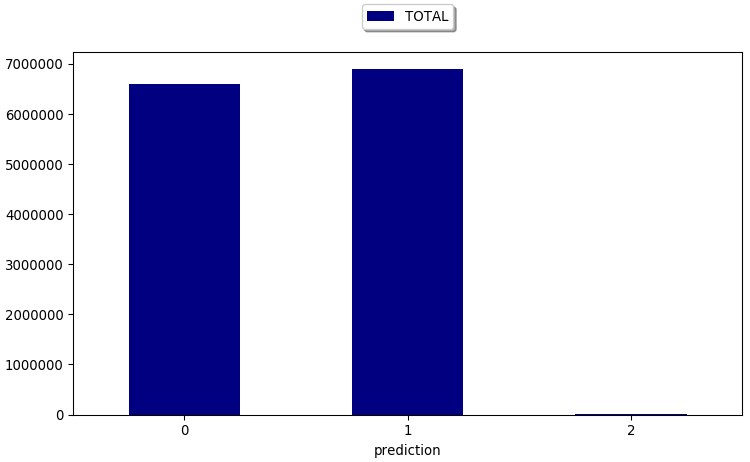

In [20]:
display(predictions)

![cluster](img/fix.PNG)

![cluster](img/fix2.PNG)